In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import os
import warnings
warnings.filterwarnings('ignore')

trainData = pd.read_csv("input/train.csv")

#see how data is
trainData.sample(5)

,Image,Id
19058,bff451467.jpg,new_whale
6832,454ee2805.jpg,w_34120de
21140,d4dade3a1.jpg,new_whale
4155,2aba65b94.jpg,w_f0fe284
7659,4d9c4a1a0.jpg,new_whale


## 2. Prepare Images

1. Change the shape of the images
2. Put images into an array

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg
Processing image

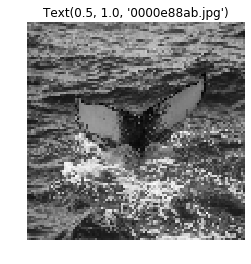

In [7]:
x_train = trainData.drop(labels = ["Id"], axis = 1)
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img("input/"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train


x_train = prepareImages(trainData, trainData.shape[0], "train")

# normalize images and show one
x_train /= 255
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.title(plt.title(trainData.iloc[0,0]))
plt.axis("off")
plt.show()

## 3. One hot Encode Labels

In [8]:
# put labels into y_train variable
y_train = trainData["Id"]
print(y_train.shape)
print(len(y_train))

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


values = array(y_train)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
y_train=onehot_encoded

(25361,)
25361
['w_f48451c' 'w_c3d896a' 'w_20df2c5' ... 'w_bd1c3d5' 'w_9f30885'
 'new_whale']
[4786 3808  662 ... 3671 3103    0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
Randomly Partition Training Set

In [ ]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

## 4. CNN

In [9]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import RMSprop,Adam
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', input_shape = (100,100,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.25))

# FC
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1]))
model.add(Activation("softmax"))

model.summary()


# use Adam optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=100, epochs=80, verbose=1)
gc.collect()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        4640      
_________________________________________________________________
activation_2 (Activat

25361/25361 [==============================] - 320s 13ms/step - loss: 0.1358 - acc: 0.9561
Epoch 43/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1343 - acc: 0.9575
Epoch 44/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1581 - acc: 0.9508
Epoch 45/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1354 - acc: 0.9561
Epoch 46/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1316 - acc: 0.9569
Epoch 47/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1316 - acc: 0.9582
Epoch 48/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1309 - acc: 0.9580
Epoch 49/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1169 - acc: 0.9616
Epoch 50/80
25361/25361 [==============================] - 319s 13ms/step - loss: 0.1245 - acc: 0.9611
Epoch 51/80
25361/25361 [==============================] - 320s 13ms/step - loss: 0.1

50

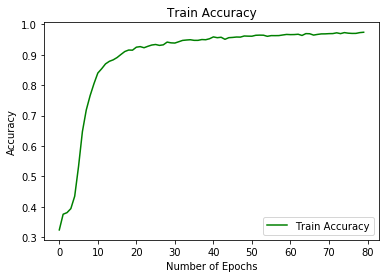

Train accuracy:  0.9739757985455969
Train loss:  0.08619228425927401


In [10]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print('Train accuracy: ',history.history['acc'][-1])

print('Train loss: ',history.history['loss'][-1])

## 5. Run model on the test set and predict

In [11]:
test = os.listdir("input/test/")

test_data = pd.DataFrame(test, columns=['Image'])
test_data['Id'] = ''

x_test = prepareImages(test_data, test_data.shape[0], "test")
# normalize
x_test /= 255

# predict
predictions = model.predict(np.array(x_test), verbose=1)

# write top 5 predictions
for i, pred in enumerate(predictions):
    test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

# see some examples
test_data.tail(5)
test_data.to_csv('submission_whale.csv', index=False)

Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg
7960/7960 [==============================] - 26s 3ms/step
